In [ ]:
# PART 1 (Importing, Loading Data, Statistical Summary, Visualizing Feature Distribution, Correlation Matrix & Feature Selection)
#        (Also go over using CoLab vs VSCode, and how to set up project and that some python knowledge is needed)

# Install necessary libraries (if using Google Colab)
# !pip install scikit-learn pandas numpy seaborn matplotlib

# Import libraries
import numpy as np                          # For numerical computations
import pandas as pd                         # For data manipulation and analysis
import seaborn as sns                       # For creating visualizations (heatmaps, plots)
import matplotlib.pyplot as plt             # For creating plots and visualizations


# Scikit-learn libraries
from sklearn.datasets import fetch_california_housing     # For loading the California Housing dataset
from sklearn.model_selection import train_test_split      # For splitting the data into training and testing sets
from sklearn.linear_model import LinearRegression         # For performing linear regression
from sklearn import metrics                               # For calculating evaluation metrics like MSE, R² score


# New Section

In [ ]:
# Load the California Housing dataset from scikit-learn
housing = fetch_california_housing()

# Convert the dataset into a pandas DataFrame for easier manipulation
data = pd.DataFrame(housing.data, columns=housing.feature_names)  # Use feature names as column headers
data['MedHouseValue'] = housing.target                           # Add target variable (Median House Value) to the DataFrame

# Display the first 5 rows of the dataset to understand the structure and data
print(data.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseValue  
0    -122.23          4.526  
1    -122.22          3.585  
2    -122.24          3.521  
3    -122.25          3.413  
4    -122.25          3.422  


In [ ]:
# Check for missing values in the dataset by summing null values for each column
print(data.isnull().sum())   # Output should be 0, as this dataset has no missing values

# Get a statistical summary of the dataset including mean, min, max, and percentiles
print(data.describe())


MedInc           0
HouseAge         0
AveRooms         0
AveBedrms        0
Population       0
AveOccup         0
Latitude         0
Longitude        0
MedHouseValue    0
dtype: int64
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  MedHouseValue  
count  20640.000000  20640.000000  2064

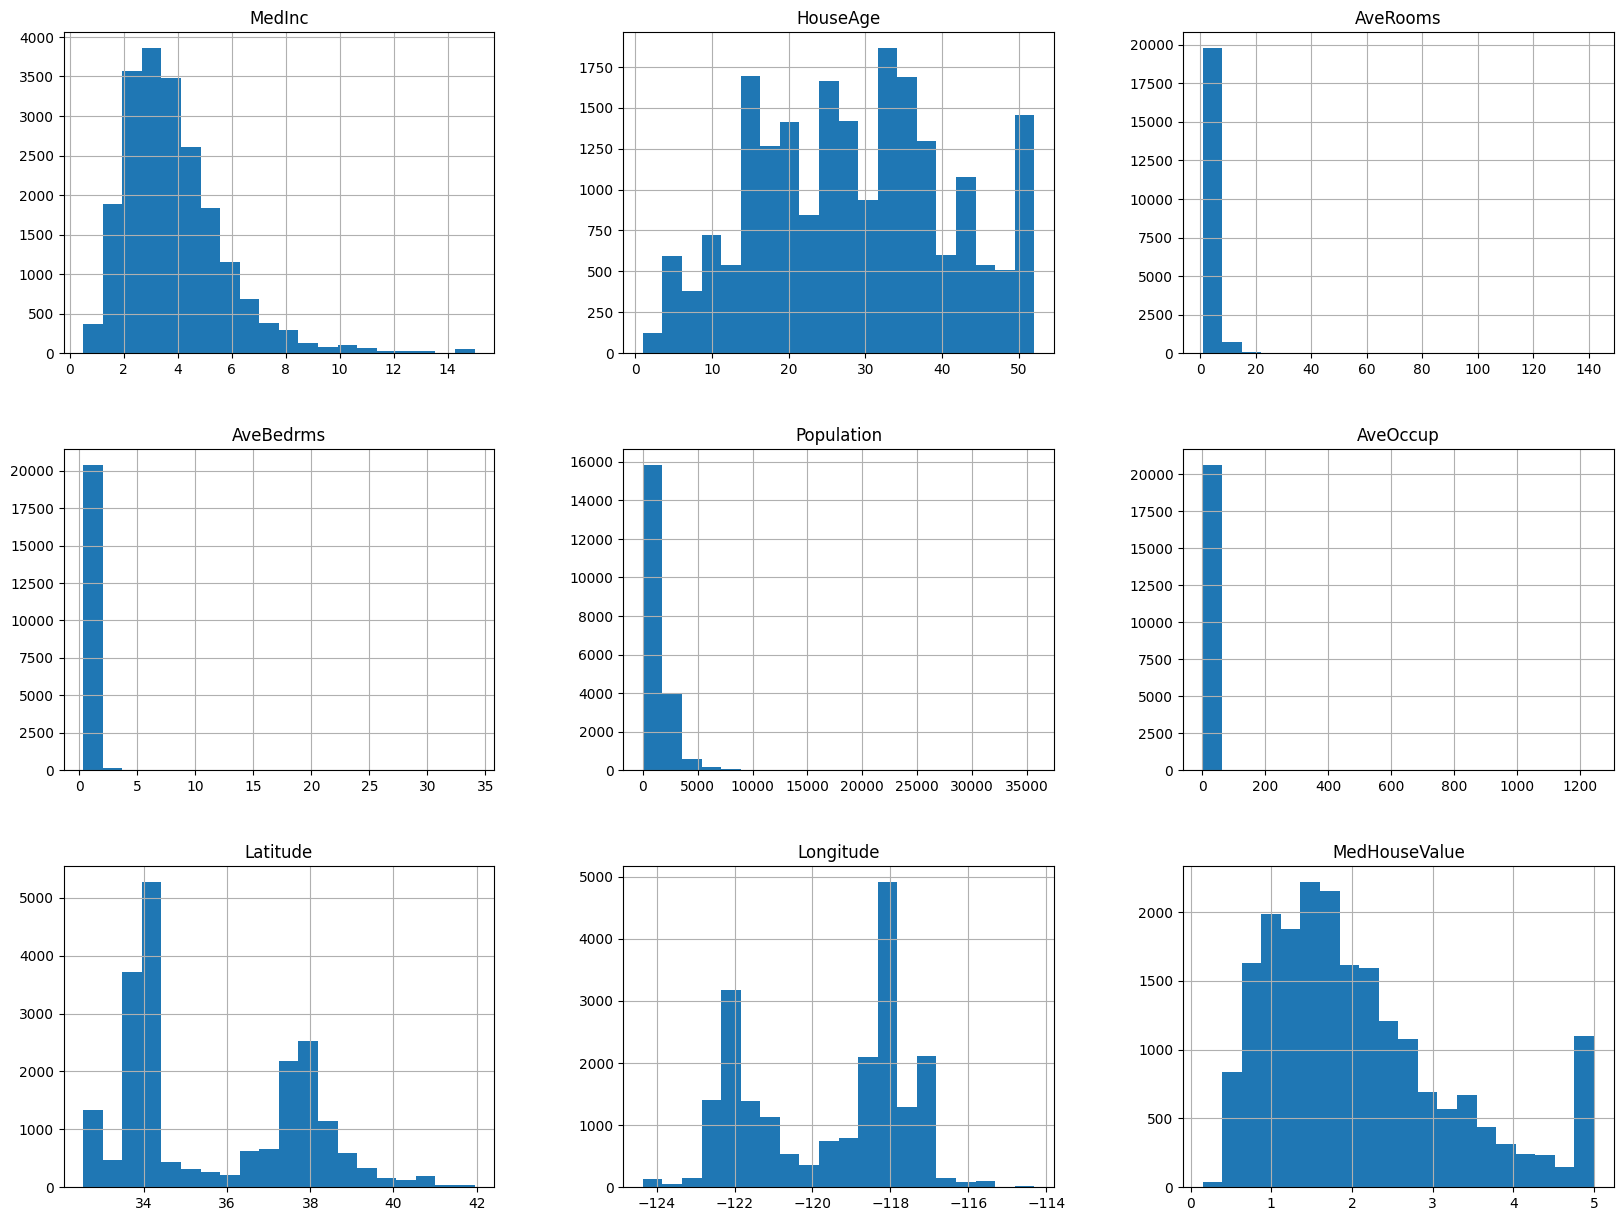

In [ ]:
# Plot histograms for all the features to understand their distributions
data.hist(bins=20, figsize=(20, 15))   # 20 bins for the histogram, large figure size for better readability
plt.show()

# Go over Histogram, and Heatmaps

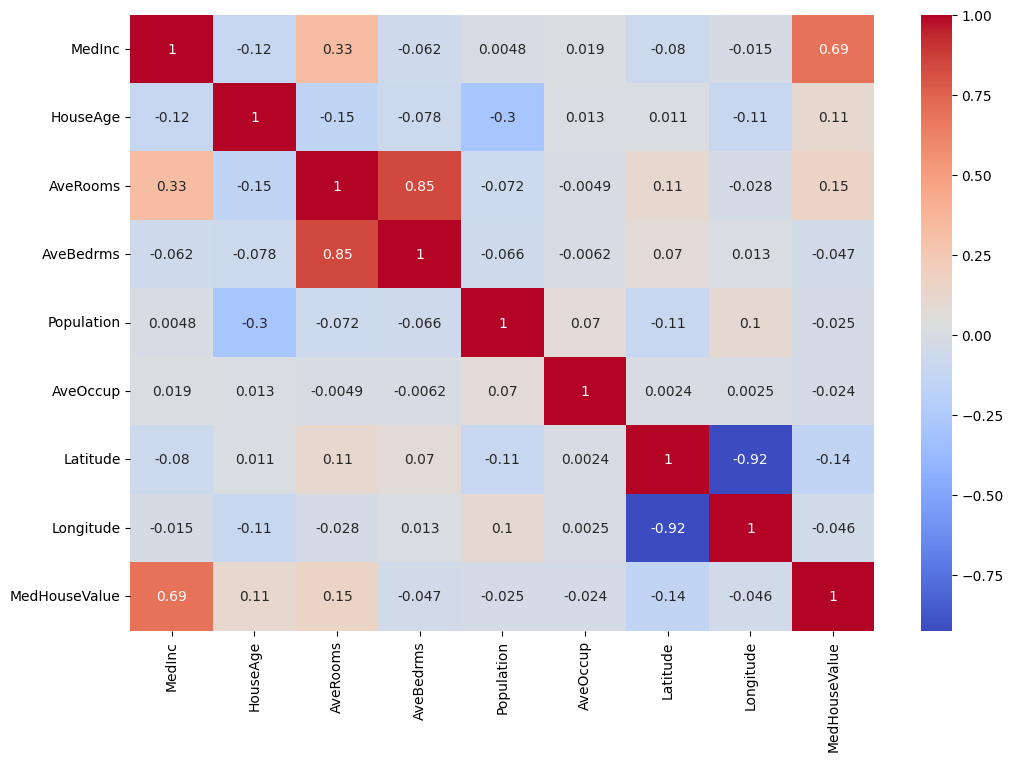

In [ ]:
# Compute the correlation matrix to observe relationships between features
corr_matrix = data.corr()

# Visualize the correlation matrix using a heatmap for better understanding of feature correlations
plt.figure(figsize=(12, 8))               # Set figure size for heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')  # Plot heatmap with annotations and color mapping
plt.show()

In [ ]:
# PART 2 (Splitting data [training and test], Training regression, evaluating the model)

# Select a subset of features that are highly correlated with the target (MedHouseValue)
selected_features = ['MedInc', 'AveRooms', 'AveOccup', 'Latitude', 'Longitude']  # Selected based on analysis or prior knowledge

# Split the dataset into independent (X) and dependent (y) variables
X = data[selected_features]  # Features (independent variables)
y = data['MedHouseValue']    # Target (dependent variable)


In [ ]:
# Split the dataset into training and testing sets with an 80-20 split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # random_state for reproducibility


In [ ]:
# Create a Linear Regression model instance
model = LinearRegression()

# Train the Linear Regression model using the training data
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Use the trained model to predict house values on the test data
y_pred = model.predict(X_test)


In [ ]:
# Calculate evaluation metrics to assess model performance
mse = metrics.mean_squared_error(y_test, y_pred)  # Mean Squared Error
rmse = np.sqrt(mse)                               # Root Mean Squared Error (sqrt of MSE)
r2 = metrics.r2_score(y_test, y_pred)             # R-squared score (explains the variance in the data)

# Print the calculated evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²) Score: {r2:.4f}")


Mean Squared Error (MSE): 0.5592
Root Mean Squared Error (RMSE): 0.7478
R-squared (R²) Score: 0.5733


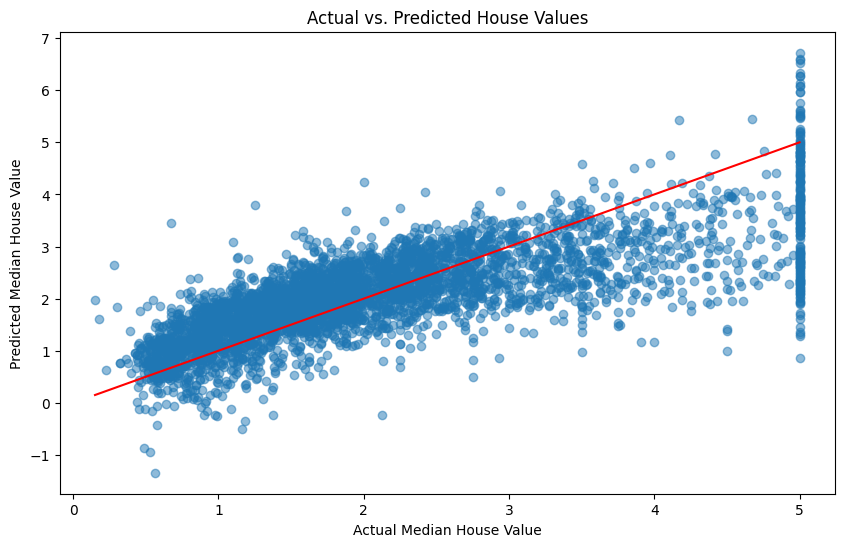

In [ ]:
# PART 3 (Visualising Actual vs Predicted, Residuals, Feature Coefficients)

# Plot the relationship between actual and predicted median house values
plt.figure(figsize=(10,6))                         # Set the plot size
plt.scatter(y_test, y_pred, alpha=0.5)             # Scatter plot of actual vs predicted values, alpha for transparency
plt.xlabel("Actual Median House Value")            # Label for x-axis
plt.ylabel("Predicted Median House Value")         # Label for y-axis
plt.title("Actual vs. Predicted House Values")     # Title of the plot
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # Line of perfect prediction (diagonal)
plt.show()


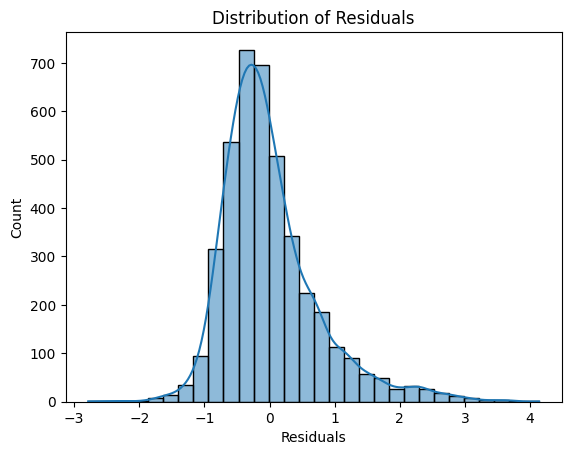

In [ ]:
# Calculate the residuals (errors) by subtracting predicted values from actual values
residuals = y_test - y_pred

# Plot the distribution of residuals to check if they are normally distributed (indication of good model fit)
sns.histplot(residuals, bins=30, kde=True)  # Histogram with Kernel Density Estimate (KDE) curve
plt.xlabel("Residuals")                     # Label for x-axis
plt.title("Distribution of Residuals")      # Title of the plot
plt.show()


In [ ]:
# Create a DataFrame showing the coefficients of the features in the linear regression model
coefficients = pd.DataFrame({'Feature': selected_features, 'Coefficient': model.coef_})

# Print the feature names and their corresponding coefficients to interpret the model
print(coefficients)


     Feature  Coefficient
0     MedInc     0.360757
1   AveRooms     0.016730
2   AveOccup    -0.003008
3   Latitude    -0.497858
4  Longitude    -0.510636


In [ ]:
import numpy as np

# Function to allow user to select an index from the test dataset
def select_index_from_test_data():
    print("Available entries in the test dataset (showing MedInc, AveRooms, AveOccup):")

    # Display a subset of available options
    for i in range(0,len(X_test),50):
        print(f"Index {i}: MedInc={X_test['MedInc'].iloc[i]:.4f}, AveRooms={X_test['AveRooms'].iloc[i]:.4f}, AveOccup={X_test['AveOccup'].iloc[i]:.4f}")

    # Let user choose an index
    selected_index = int(input("\nPlease enter the index of the house you want to compare: "))

    # Ensure the selected index is valid
    if selected_index < 0 or selected_index >= len(X_test):
        print("Invalid index. Please choose a valid index from the list.")
        return None

    return selected_index

# Updated function to predict house price based on selected index
def predict_house_price_from_selected_index():
    selected_index = select_index_from_test_data()
    if selected_index is None:
        return  # Exit if an invalid index was provided

    # Get features from the selected index
    MedInc = X_test['MedInc'].iloc[selected_index]
    AveRooms = X_test['AveRooms'].iloc[selected_index]
    AveOccup = X_test['AveOccup'].iloc[selected_index]

    # Use standard average values for Latitude and Longitude
    Latitude = 35.63
    Longitude = -119.57

    # Create a DataFrame for the input data
    input_data = pd.DataFrame([[MedInc, AveRooms, AveOccup, Latitude, Longitude]],
                              columns=['MedInc', 'AveRooms', 'AveOccup', 'Latitude', 'Longitude'])

    # Predict house price using the trained model
    predicted_price = model.predict(input_data)[0]

    # Output the predicted price
    print(f"\nInput Features (from test data):")
    print(f"Median Income (MedInc): {MedInc:.4f}")
    print(f"Average Number of Rooms (AveRooms): {AveRooms:.4f}")
    print(f"Average Occupancy (AveOccup): {AveOccup:.4f}")

    print(f"\nPredicted House Price: {predicted_price:.4f}")

    # Retrieve the actual price from the test set
    actual_price = y_test.iloc[selected_index]

    # Display the actual house price
    print(f"\nActual House Price: {actual_price:.4f}")

# Call the function to make a prediction based on user-selected index
predict_house_price_from_selected_index()







# 1. Standard Average Values for the Demo:
# Here are the average values of the key features from the dataset that you can use:

# Median Income (MedInc):
# 3.87
# 3.87 (represents the average income level)
# Average Number of Rooms (AveRooms):
# 5.43
# 5.43 (average number of rooms per house)
# Average Occupancy (AveOccup):
# 3.07
# 3.07 (average number of occupants per household)
# Latitude:
# 35.63
# 35.63 (standard average)
# Longitude:
# −
# 119.57
# −119.57 (standard average)

Available entries in the test dataset (showing MedInc, AveRooms, AveOccup):
Index 0: MedInc=1.6812, AveRooms=4.1922, AveOccup=3.8774
Index 50: MedInc=4.5000, AveRooms=6.1429, AveOccup=2.7720
Index 100: MedInc=3.0598, AveRooms=4.3101, AveOccup=2.1676
Index 150: MedInc=1.5972, AveRooms=2.5103, AveOccup=3.0182
Index 200: MedInc=3.0546, AveRooms=2.9226, AveOccup=2.2622
Index 250: MedInc=2.4167, AveRooms=5.9389, AveOccup=3.5284
Index 300: MedInc=1.1917, AveRooms=4.3111, AveOccup=2.1778
Index 350: MedInc=1.9811, AveRooms=6.1047, AveOccup=1.9831
Index 400: MedInc=3.3702, AveRooms=4.5767, AveOccup=1.8233
Index 450: MedInc=4.6366, AveRooms=5.3118, AveOccup=2.2667
Index 500: MedInc=2.9018, AveRooms=4.6212, AveOccup=2.1288
Index 550: MedInc=3.3333, AveRooms=6.4104, AveOccup=3.3735
Index 600: MedInc=3.5670, AveRooms=6.0745, AveOccup=2.3511
Index 650: MedInc=0.9889, AveRooms=3.6111, AveOccup=3.9556
Index 700: MedInc=2.7159, AveRooms=5.3066, AveOccup=3.2436
Index 750: MedInc=2.4183, AveRooms=4.5829,